In [30]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from sklearn.metrics import roc_curve, roc_auc_score
import scikit_posthocs as sp

In [31]:
hf = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
stud = pd.read_csv("data/student-por.csv")

# Statystyka opisowa

## Heart Failure

In [32]:
hf.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [33]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [34]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Student Por

In [35]:
stud.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [36]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [37]:
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Testy parametryczne

## Test t

In [38]:
alive = hf.loc[hf["DEATH_EVENT"] == 0, "ejection_fraction"]
dead  = hf.loc[hf["DEATH_EVENT"] == 1, "ejection_fraction"]
t_stat, p_val = stats.ttest_ind(alive, dead, equal_var=False)
print(f"Test t (frakcja wyrzutowa): t = {t_stat:.2f}, p = {p_val:.4f}")

Test t (frakcja wyrzutowa): t = 4.57, p = 0.0000


## anova wiek 3 grupy

In [39]:
hf["age_cat"] = pd.cut(hf["age"], bins=[0,50,60,120], labels=["<50","50‑60",">60"])
anova = sm.stats.anova_lm(smf.ols("serum_sodium ~ C(age_cat)", data=hf).fit())
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(age_cat),2.0,22.772295,11.386148,0.58317,0.558766
Residual,296.0,5779.274527,19.524576,NaN,NaN


# Nieparametryczne

In [40]:
u_stat, p_val = stats.mannwhitneyu(
    hf.loc[hf["DEATH_EVENT"] == 0, "platelets"],
    hf.loc[hf["DEATH_EVENT"] == 1, "platelets"],
    alternative="two-sided")
print(f"Mann‑Whitney U (platelets): U = {u_stat:.0f}, p = {p_val:.4f}")

Mann‑Whitney U (platelets): U = 10300, p = 0.4256


In [41]:
chi2, p, dof, tbl = stats.chi2_contingency(pd.crosstab(hf["sex"], hf["DEATH_EVENT"]))
print(f"Chi‑kwadrat (sex × zgon): χ² = {chi2:.2f}, p = {p:.4f}\n")
print(tbl)

Chi‑kwadrat (sex × zgon): χ² = 0.00, p = 1.0000

[[ 71.28762542  33.71237458]
 [131.71237458  62.28762542]]


# Kaplan mayer

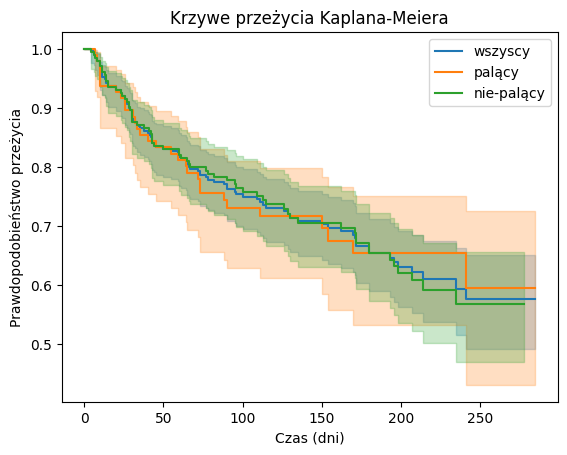

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 0.96      0.05


In [42]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots()
kmf.fit(hf["time"], event_observed=hf["DEATH_EVENT"], label="wszyscy")
kmf.plot(ax=ax)

for grp, lbl in [(1,"palący"), (0,"nie‑palący")]:
    mask = hf["smoking"] == grp
    kmf.fit(hf.loc[mask, "time"], event_observed=hf.loc[mask, "DEATH_EVENT"], label=lbl)
    kmf.plot(ax=ax)

ax.set_xlabel("Czas (dni)")
ax.set_ylabel("Prawdopodobieństwo przeżycia")
ax.set_title("Krzywe przeżycia Kaplana‑Meiera")
plt.show()

result = logrank_test(
    hf.loc[hf.smoking==1, "time"], hf.loc[hf.smoking==0, "time"],
    event_observed_A=hf.loc[hf.smoking==1, "DEATH_EVENT"],
    event_observed_B=hf.loc[hf.smoking==0, "DEATH_EVENT"])
print(result)

# Regresja

In [43]:
formula = "DEATH_EVENT ~ age + ejection_fraction + serum_sodium + smoking"
logit_model = smf.logit(formula, data=hf).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.537667
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            4
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                  0.1434
Time:                        13:00:11   Log-Likelihood:                -160.76
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 5.728e-11
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.0127      4.323      1.853      0.064      -0.461      16.486
age                   0.0550      0.012      4.601      0.000       0.032       0.078
ejection_fraction    -0.0617      0.014     -4.510      0.000      -0.089      -0.035
serum_sodium         -0.0722      0.031     -2.292      0.022      -0.134      -0.010
smoking              -0.1914      0.294     -0.652      0.515      -0.767       0.384
=====================================================================================
"""

# ROC / AUC

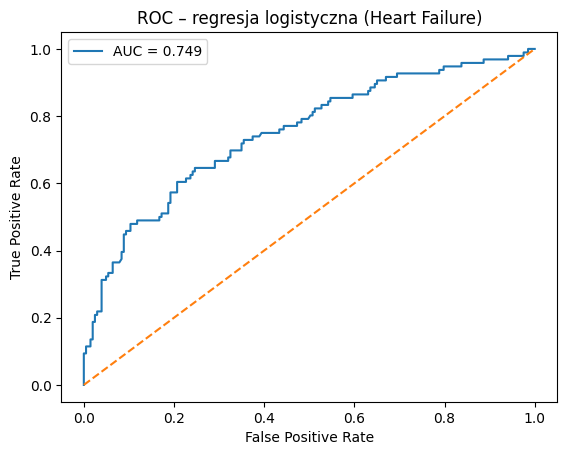

In [44]:
y_true = hf["DEATH_EVENT"]
y_pred = logit_model.predict(hf)
fpr, tpr, _ = roc_curve(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)

plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC – regresja logistyczna (Heart Failure)")
plt.legend()
plt.show()

# Friedmann

In [45]:
friedman_stat, p_val = stats.friedmanchisquare(stud["G1"], stud["G2"], stud["G3"])
print(f"Friedman: χ² = {friedman_stat:.2f}, p = {p_val:.4e}")

posthoc = sp.posthoc_wilcoxon(stud[["G1","G2","G3"]], p_adjust="holm")
display(posthoc)

plt.boxplot([stud["G1"], stud["G2"], stud["G3"]], labels=["G1","G2","G3"])
plt.ylabel("Ocena")
plt.title("Zmiana ocen w trzech okresach (Student Performance)")
plt.show()

Friedman: χ² = 167.33, p = 4.6252e-37


ValueError: Specify correct column names using `group_col` and `val_col` args